***Importing Libraries***

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


***Load Data***

In [49]:
# Load the dataset
data = pd.read_csv('/content/DT-BrainCancer.csv')
print(data.shape)
print(data.head())
data = data.drop(data.columns[0], axis=1)
print(data.head())


(88, 7)
   Unnamed: 0     sex   diagnosis             loc  ki    gtv  status
0           1  Female  Meningioma  Infratentorial  90   6.11       0
1           2    Male   HG glioma  Supratentorial  90  19.35       1
2           3  Female  Meningioma  Infratentorial  70   7.95       0
3           4  Female   LG glioma  Supratentorial  80   7.61       1
4           5    Male   HG glioma  Supratentorial  90   5.06       1
      sex   diagnosis             loc  ki    gtv  status
0  Female  Meningioma  Infratentorial  90   6.11       0
1    Male   HG glioma  Supratentorial  90  19.35       1
2  Female  Meningioma  Infratentorial  70   7.95       0
3  Female   LG glioma  Supratentorial  80   7.61       1
4    Male   HG glioma  Supratentorial  90   5.06       1


***One Hot Encoding using Dummies***

In [50]:
# Convert categorical variables to numeric
data = pd.get_dummies(data, columns=['sex', 'diagnosis', 'loc'])
print(data.head())

   ki    gtv  status  sex_Female  sex_Male  diagnosis_HG glioma  \
0  90   6.11       0        True     False                False   
1  90  19.35       1       False      True                 True   
2  70   7.95       0        True     False                False   
3  80   7.61       1        True     False                False   
4  90   5.06       1       False      True                 True   

   diagnosis_LG glioma  diagnosis_Meningioma  diagnosis_Other  \
0                False                  True            False   
1                False                 False            False   
2                False                  True            False   
3                 True                 False            False   
4                False                 False            False   

   loc_Infratentorial  loc_Supratentorial  
0                True               False  
1               False                True  
2                True               False  
3               False         

***2.Data Spliting***

In [51]:
# Split the data
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

#training,test,val data splitting
X_train, y_train = train_data.drop('status', axis=1), train_data['status']
X_val, y_val = val_data.drop('status', axis=1), val_data['status']
X_test, y_test = test_data.drop('status', axis=1), test_data['status']


print(X_train.head())
print(y_train.head())
print(y_train.shape)
print(y_val.head())
print(y_val.shape)



    ki    gtv  sex_Female  sex_Male  diagnosis_HG glioma  diagnosis_LG glioma  \
39  90   2.54        True     False                False                False   
31  90   2.56       False      True                False                False   
35  70  14.26        True     False                False                False   
45  60   7.09       False      True                False                False   
44  90   3.12       False      True                False                False   

    diagnosis_Meningioma  diagnosis_Other  loc_Infratentorial  \
39                  True            False               False   
31                  True            False               False   
35                 False             True               False   
45                  True            False               False   
44                 False             True                True   

    loc_Supratentorial  
39                True  
31                True  
35                True  
45                True

***Building Confusion Matrix Manually***

In [52]:

def confusion_matrix(y_true, y_pred):
  TP=0
  TN=0
  FP=0
  FN=0
  y_arr = y_true.to_numpy()
  for i in range(len(y_arr)):
    if y_arr[i] == y_pred[i]:
      if y_arr [i] == 1:
        TP += 1
      else:
        TN += 1
    else:
      if y_arr [i] == 1:
        FN += 1
      else:
        FP += 1

  return TP, TN, FP, FN


***Implemanting Evaluation Matrix***

In [53]:
def measure_accuracy(TP, TN, FP, FN):
  accuracy = (TP+TN)/(TP+TN+FP+FN)
  return accuracy

def measure_precision(TP, FP, TN, FN):
  precision_0 = TN/(TN + FN)
  precision_1 = TP/(TP+FP)
  return precision_0, precision_1

def measure_recall(TP, FP, TN, FN):
  recall_0 = TN/(TN + FP)
  recall_1 = TP/(TP+FN)
  return recall_0, recall_1

def measure_f1_score(precision, recall):
  f1_score_0 = 2*(precision[0]*recall[0])/(precision[0]+recall[0])
  f1_score_1 = 2*(precision[1]*recall[1])/(precision[1]+recall[1])
  return f1_score_0, f1_score_1

# ***Single Decision Tree Model***

________VALIDATION SET RESULTS________
Accuracy: 0.6923076923076923
Precision: [0.75 0.6 ]
Recall: [0.75 0.6 ]
F1-score: [0.75 0.6 ]
Confusion Matrix:
 (3, 6, 2, 2)
________TEST SET RESULTS________
Test Accuracy: 0.5714285714285714
Test Precision: [0.75       0.33333333]
Test Recall: [0.6 0.5]
Test F1-score: [0.66666667 0.4       ]
Confusion Matrix:
 (2, 6, 4, 2)
Confusion Matrix:
TN: 6  TP: 2
FN: 2  TP: 3
Accuracy: 0.6923076923076923
Precision: (0.75, 0.6)
Recall: (0.75, 0.6)
F1_Score: (0.75, 0.6)
Confusion Matrix:
TN: 6  TP: 4
FN: 2  TP: 2
Accuracy: 0.6923076923076923
Precision: (0.75, 0.3333333333333333)
Recall: (0.6, 0.5)
F1_Score: (0.6666666666666665, 0.4)


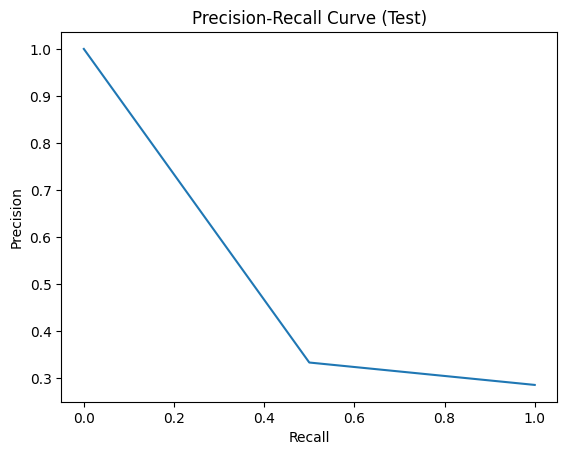

In [54]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_val = dt_model.predict(X_val)
y_pred_test = dt_model.predict(X_test)

#Evaluation Matricse using Libraries____________________________________________
cm = confusion_matrix(y_val,y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision, recall, f1, support = precision_recall_fscore_support(y_val, y_pred_val, average=None)
print("________VALIDATION SET RESULTS________")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)

cm = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_test, average=None)
print("________TEST SET RESULTS________")
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)
print("Confusion Matrix:\n",cm)


#Evaluation Matricse using manual functions_____________________________________
print("Confusion Matrix:")
TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val)
print("TN:",TN," TP:",FP)
print("FN:",FN," TP:",TP)

accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)


TP, TN, FP, FN = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print("TN:",TN," TP:",FP)
print("FN:",FN," TP:",TP)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
#_______________________________________________________________________________


#Precision-Recall Curve
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
plt.plot(recall_curve, precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.show()


# ***Evaluation Matrix***

# ***Decision Tree HyperParameter Tuning***

Model 1
Accuracy: 0.6923076923076923
Precision: (0.75, 0.6)
Recall: (0.75, 0.6)
F1_Score: (0.75, 0.6)
Model 2
Accuracy: 0.6923076923076923
Precision: (0.7, 0.6666666666666666)
Recall: (0.875, 0.4)
F1_Score: (0.7777777777777777, 0.5)
Model 3
Accuracy: 0.9230769230769231
Precision: (0.8888888888888888, 1.0)
Recall: (1.0, 0.8)
F1_Score: (0.9411764705882353, 0.888888888888889)
Model 4
Accuracy: 0.9230769230769231
Precision: (0.8888888888888888, 1.0)
Recall: (1.0, 0.8)
F1_Score: (0.9411764705882353, 0.888888888888889)
________TEST SET RESULTS________
Accuracy: 0.7857142857142857
Precision: (0.8888888888888888, 0.6)
Recall: (0.8, 0.75)
F1_Score: (0.8421052631578948, 0.6666666666666665)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

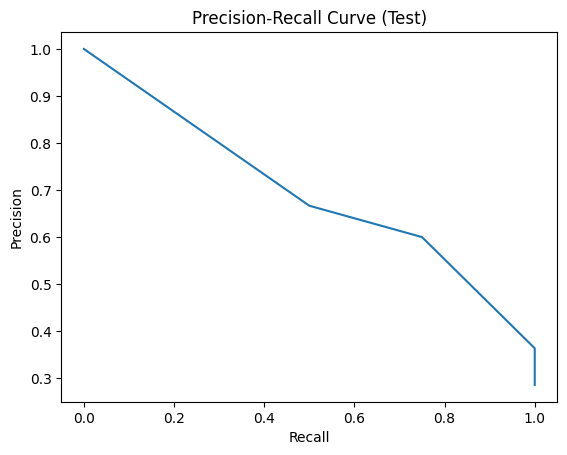

In [55]:
model1 = DecisionTreeClassifier(max_depth=10, min_samples_split=4,criterion='gini',    min_samples_leaf=1,  random_state=42)
model2 = DecisionTreeClassifier(max_depth=9,  min_samples_split=5,criterion='entropy', min_samples_leaf=4,  random_state=42)
model3 = DecisionTreeClassifier(max_depth=5,  min_samples_split=2,criterion='gini',    min_samples_leaf=10, random_state=42)
model4 = DecisionTreeClassifier(max_depth=3,  min_samples_split=3,criterion='entropy', min_samples_leaf=7,  random_state=42)


model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

y_pred_val1 = model1.predict(X_val)
y_pred_val2 = model2.predict(X_val)
y_pred_val3 = model3.predict(X_val)
y_pred_val4 = model4.predict(X_val)


TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val1)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Model 1")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)



TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val2)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Model 2")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)




TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val3)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Model 3")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)




TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val4)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Model 4")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)


y_pred_test = model3.predict(X_test)

TP, TN, FP, FN = confusion_matrix(y_test, y_pred_test)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("________TEST SET RESULTS________")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)

precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, model3.predict_proba(X_test)[:, 1])
plt.plot(recall_curve, precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt


***Decision Tree After Hyper Tuning***

# ***XGBoost***

Using matrix libraries
________VALIDATION SET RESULTS________
Confusion Matrix:
 (3, 7, 1, 2)
Accuracy: 0.7692307692307693
Precision: [0.77777778 0.75      ]
Recall: [0.875 0.6  ]
F1-score: [0.82352941 0.66666667]
________TEST SET RESULTS________
Confusion Matrix:
 (2, 6, 4, 2)
Test Accuracy: 0.5714285714285714
Test Precision: [0.75       0.33333333]
Test Recall: [0.6 0.5]
Test F1-score: [0.66666667 0.4       ]
--------------------------------
Using manual evaluation matrix
Confusion Matrix:
TN: 7  TP: 1
FN: 2  TP: 3
Accuracy: 0.7692307692307693
Precision: (0.7777777777777778, 0.75)
Recall: (0.875, 0.6)
F1_Score: (0.823529411764706, 0.6666666666666665)
Confusion Matrix:
TN: 6  TP: 4
FN: 2  TP: 2
Accuracy: 0.7692307692307693
Precision: (0.75, 0.3333333333333333)
Recall: (0.6, 0.5)
F1_Score: (0.6666666666666665, 0.4)


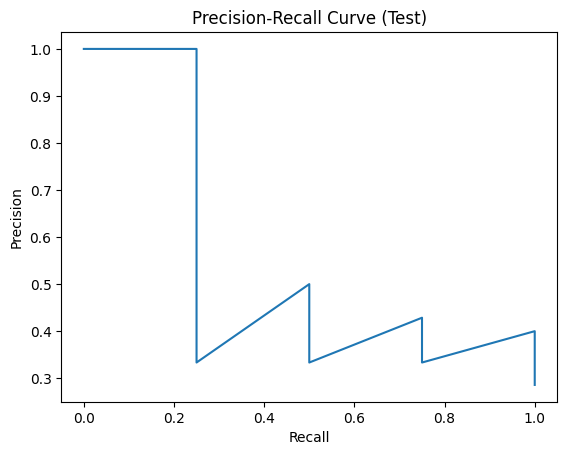

In [60]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_val = xgb_model.predict(X_val)
y_pred_test = xgb_model.predict(X_test)

#Evaluation Matricse using Libraries____________________________________________
print("Using matrix libraries")
cm = confusion_matrix(y_val,y_pred_val)
accuracy = accuracy_score(y_val, y_pred_val)
precision, recall, f1, support = precision_recall_fscore_support(y_val, y_pred_val, average=None)
print("________VALIDATION SET RESULTS________")
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

cm = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_test, average=None)
print("________TEST SET RESULTS________")
print("Confusion Matrix:\n",cm)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)
print("--------------------------------")

#Evaluation Matricse using manual functions_____________________________________
print("Using manual evaluation matrix")
print("Confusion Matrix:")
TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val)
print("TN:",TN," TP:",FP)
print("FN:",FN," TP:",TP)

accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)


TP, TN, FP, FN = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print("TN:",TN," TP:",FP)
print("FN:",FN," TP:",TP)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)
#_______________________________________________________________________________

precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(recall_curve, precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.show()

Model 1
Accuracy: 0.9230769230769231
Precision: (0.8888888888888888, 1.0)
Recall: (1.0, 0.8)
F1_Score: (0.9411764705882353, 0.888888888888889)
Model 2
Accuracy: 0.8461538461538461
Precision: (0.875, 0.8)
Recall: (0.875, 0.8)
F1_Score: (0.875, 0.8000000000000002)
Model 3
Accuracy: 0.7692307692307693
Precision: (0.8571428571428571, 0.6666666666666666)
Recall: (0.75, 0.8)
F1_Score: (0.7999999999999999, 0.7272727272727272)
Model 4
Accuracy: 0.9230769230769231
Precision: (0.8888888888888888, 1.0)
Recall: (1.0, 0.8)
F1_Score: (0.9411764705882353, 0.888888888888889)
________TEST SET RESULTS________
Accuracy: 0.7857142857142857
Precision: (0.8888888888888888, 0.6)
Recall: (0.8, 0.75)
F1_Score: (0.8421052631578948, 0.6666666666666665)


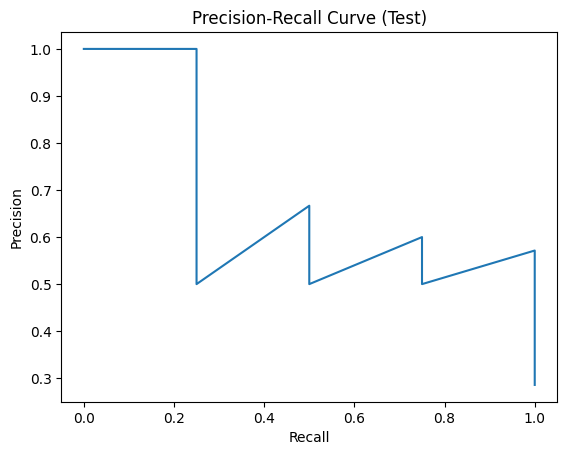

In [57]:


model1 = XGBClassifier(max_depth=4, colsample_bytree=0.8, learning_rate=0.01, n_estimators=200,subsample=1.0)
model2 = XGBClassifier(max_depth=8, colsample_bytree=0.5, learning_rate=0.1, n_estimators=100,subsample=0.5)
model3 = XGBClassifier(max_depth=7, colsample_bytree=0.7, learning_rate=0.2, n_estimators=150,subsample=0.7)
model4 = XGBClassifier(max_depth=6, colsample_bytree=0.9, learning_rate=0.02, n_estimators=200, subsample=0.8)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

y_pred_val1 = model1.predict(X_val)
y_pred_val2 = model2.predict(X_val)
y_pred_val3 = model3.predict(X_val)
y_pred_val4 = model4.predict(X_val)

TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val1)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Model 1")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)



TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val2)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Model 2")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)




TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val3)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Model 3")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)




TP, TN, FP, FN = confusion_matrix(y_val, y_pred_val4)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("Model 4")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)


y_pred_test = model1.predict(X_test)

TP, TN, FP, FN = confusion_matrix(y_test, y_pred_test)
accuracy = measure_accuracy(TP, TN, FP, FN)
precision = measure_precision(TP, FP, TN, FN)
recall = measure_recall(TP, FP, TN, FN)
f1_score = measure_f1_score(precision, recall)
print("________TEST SET RESULTS________")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_score)

precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, model1.predict_proba(X_test)[:, 1])
plt.plot(recall_curve, precision_curve)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.show()
